In [ ]:
# Network Intrusion Detection 99% Accuracy

In [1]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Specify the path to the zip file
zip_file_path = 'Network Intrusion.zip'  # Replace with your zip file path

# Specify the directory where the zip will be extracted
extract_dir = 'network_intrusion_data'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)

# Load the CSV files into dataframes
train_file_path = os.path.join(extract_dir, 'Train_data.csv')
test_file_path = os.path.join(extract_dir, 'Test_data.csv')

# Check if files exist
if os.path.exists(train_file_path) and os.path.exists(test_file_path):
    # Load the datasets
    train_df = pd.read_csv(train_file_path)
    test_df = pd.read_csv(test_file_path)

    # Display the first few rows of each dataframe
    print("\nTraining Data Sample:")
    print(train_df.head())
    
    print("\nTest Data Sample:")
    print(test_df.head())
else:
    print("Train_data.csv or Test_data.csv not found in the extracted files.")

Extracted files: ['Test_data.csv', 'Train_data.csv']

Training Data Sample:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00     

In [5]:
# Display dataset information
print("\nTraining Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())

# Check for missing values
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows in Training Data:", train_df.duplicated().sum())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  


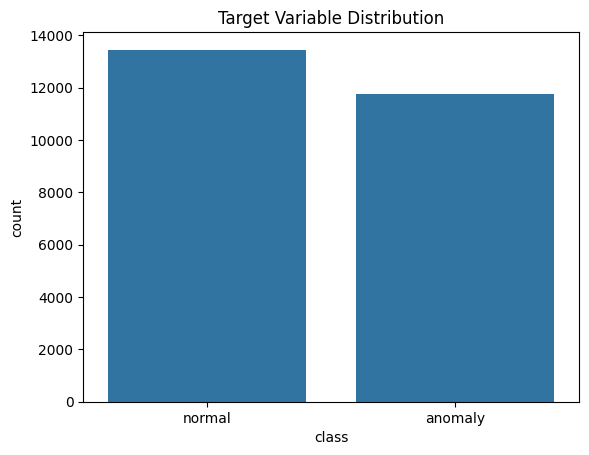

In [6]:
# Visualize the target variable
sns.countplot(data=train_df, x='class')
plt.title('Target Variable Distribution')
plt.show()

Non-numeric columns: Index(['protocol_type', 'service', 'flag'], dtype='object')


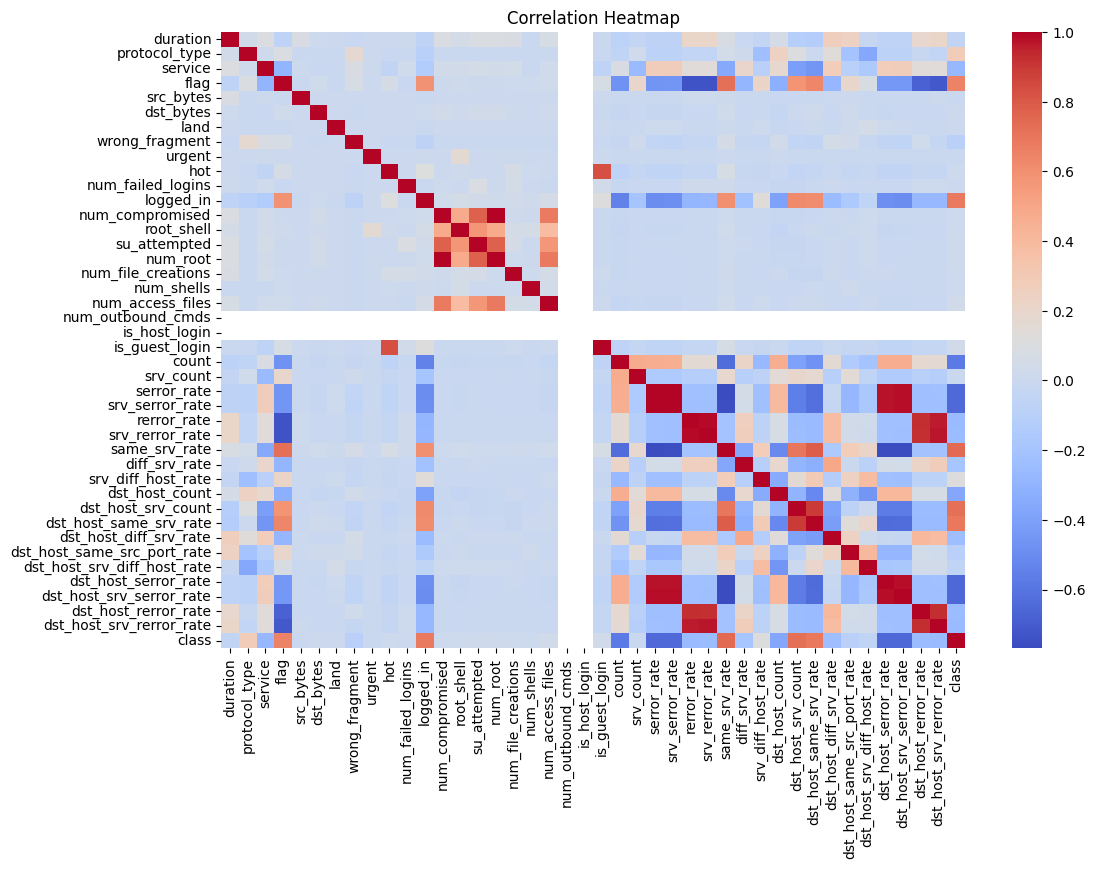

In [8]:
# Identify non-numeric columns
non_numeric_cols = train_df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Encode non-numeric columns using LabelEncoder if needed
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in non_numeric_cols:
    label_encoders[col] = LabelEncoder()
    train_df[col] = label_encoders[col].fit_transform(train_df[col])

# Compute correlation on numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Combine train and test datasets for consistent encoding
train_df['is_train'] = 1
test_df['is_train'] = 0
combined_df = pd.concat([train_df, test_df], axis=0)

# One-hot encoding for categorical features
categorical_cols = ['protocol_type', 'service', 'flag']
combined_df = pd.get_dummies(combined_df, columns=categorical_cols, drop_first=True)

# Split back into train and test datasets
train_df = combined_df[combined_df['is_train'] == 1].drop(columns=['is_train'])
test_df = combined_df[combined_df['is_train'] == 0].drop(columns=['is_train', 'class'])

# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = train_df.drop('class', axis=1)
y_train = train_df['class']

X_test = test_df  # Already filtered for test features

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print shapes for verification
print("\nShape of Scaled Training Features:", X_train_scaled.shape)
print("Shape of Scaled Test Features:", X_test_scaled.shape)

C:\Users\milto\AppData\Local\Temp\ipykernel_19028\3474013935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['is_train'] = 1



Shape of Scaled Training Features: (25192, 172)
Shape of Scaled Test Features: (22544, 172)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3516
         1.0       0.99      0.99      0.99      4042

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558


Confusion Matrix:


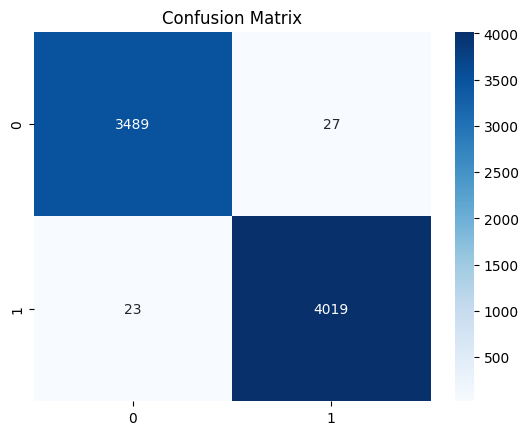

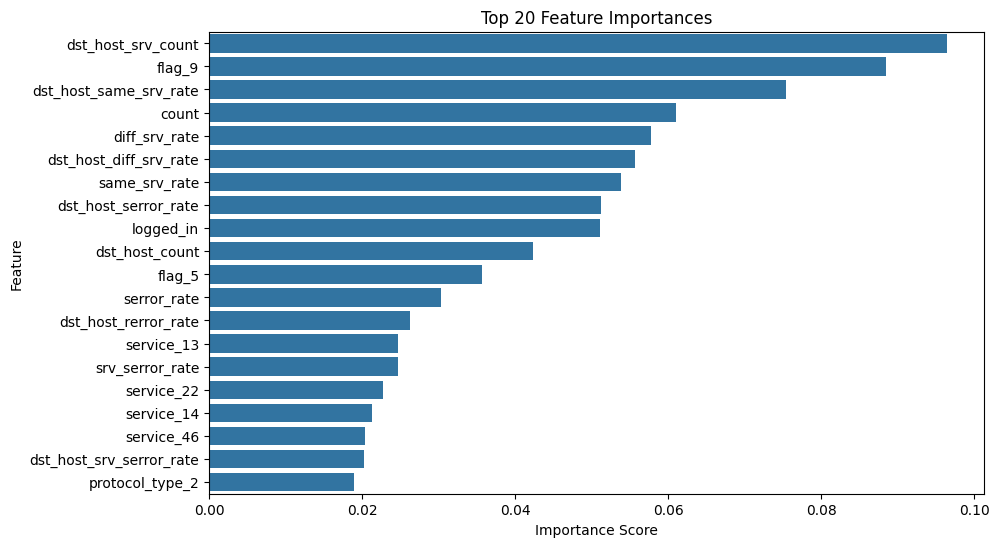

In [13]:
# Split the data into training and validation sets
X = X_train_scaled  # Scaled features
y = train_df['class']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_val)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Feature importance visualization
feature_importances = rf_model.feature_importances_
features = train_df.drop('class', axis=1).columns

# Sort features by importance
sorted_idx = feature_importances.argsort()[::-1]
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot top 20 features
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances[:20], y=sorted_features[:20], orient='h')
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
